In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import pickle,re


In [2]:
t14_cases = pickle.load(open('estimates.pickle','rb'))['t14_cases']
t14_recovered = pickle.load(open('estimates.pickle','rb'))['t14_recovered']
estimated_cases = pickle.load(open('estimates.pickle','rb'))['estimated_cases']
estimated_recovered = pickle.load(open('estimates.pickle','rb'))['estimated_recovered']
cases_added = pickle.load(open('time_series.pickle','rb'))['cases_added'].loc[estimated_cases.index]
cases_full = pickle.load(open('time_series.pickle','rb'))['cases_full'].loc[estimated_cases.index]
deaths_added = pickle.load(open('time_series.pickle','rb'))['deaths_added'].loc[estimated_cases.index]
ecbd = pickle.load(open('time_series.pickle','rb'))['ECBD'].loc[estimated_cases.index]
for i in range(1,len(list(ecbd))):
    ecbd[list(ecbd)[i]] += ecbd[list(ecbd)[i-1]]
ecbd = ecbd*(100/1.38)                                                 

In [3]:
fips = pd.read_excel('fips_data.xlsx')[1:]
fips['lat'] = fips.apply(lambda x: float(re.sub('–','-',str(x['Latitude'])[:-1])),axis=1)
fips['lon'] = fips.apply(lambda x: float(re.sub('–','-',str(x['Longitude'])[:-1])),axis=1)
fips['index'] = fips['FIPS']




#### Section 0

C:\Users\Kellen\Anaconda\envs\kellen\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


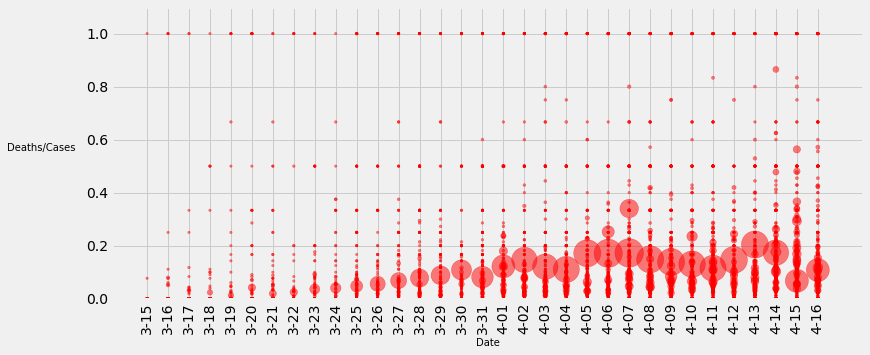

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
'''for day in range(15,80):
    dates = all_dates[day-1:day]
    plt.scatter([str(dates[-1])[6:-9] for x in cases_added.index],deaths_added[dates].sum(axis=1)/cases_added[dates].sum(axis=1),alpha=1-(day+15)/100,s=10+1*deaths_added[dates].sum(axis=1),c='Red')
'''
for fips in ecbd.index:
    plt.scatter([str(x)[6:-9] for x in list(ecbd)[57:]],deaths_added[list(ecbd)[57:]].loc[fips]/cases_added[list(ecbd)[57:]].loc[fips],s=5+deaths_added[list(ecbd)[57:]].loc[fips],color='red',alpha=.5)

plt.ylim(0,1.1)
plt.xticks(rotation=90)
plt.xlabel('Date',size=10)
plt.ylabel('Deaths/Cases                          ',rotation=0,size=10)
plt.show()


#### Section 1

In [5]:
date = list(t14_cases)[-1]
total = t14_cases[date].sum()+t14_recovered[date].sum()
print('Total of %d estimated cases, current and recovered, on %s' %(total,str(date)))

reported = cases_full[date].sum()
print('Total of %d reported cases on %s' %(reported,str(date)))
print('Rate of underreporting %d' %(100*total/reported))


Total of 5099675 estimated cases, current and recovered, on 2020-04-16 00:00:00
Total of 659939 reported cases on 2020-04-16 00:00:00
Rate of underreporting 772


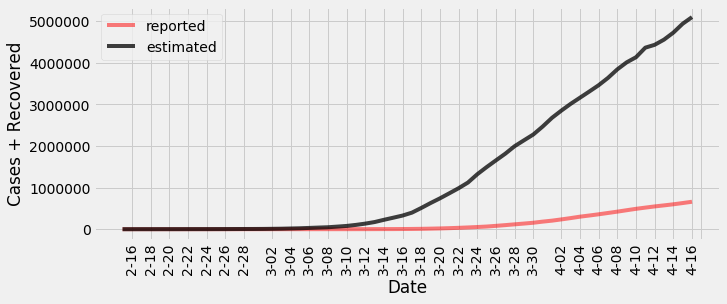

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
plt.plot([str(x)[6:-9] for x in list(t14_cases)],cases_full[list(t14_cases)].sum(),label='reported',linewidth=4,color='red',alpha=.5)
plt.plot([str(x)[6:-9] for x in list(t14_cases)],t14_cases.sum()+t14_recovered.sum(),label='estimated',linewidth=4,color='black',alpha=.75)
plt.xticks([str(x)[6:-9] if int(str(x)[9])%2==0  else '' for x in list(t14_cases)],rotation=90)

plt.ylabel('Cases + Recovered')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


C:\Users\Kellen\Anaconda\envs\kellen\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


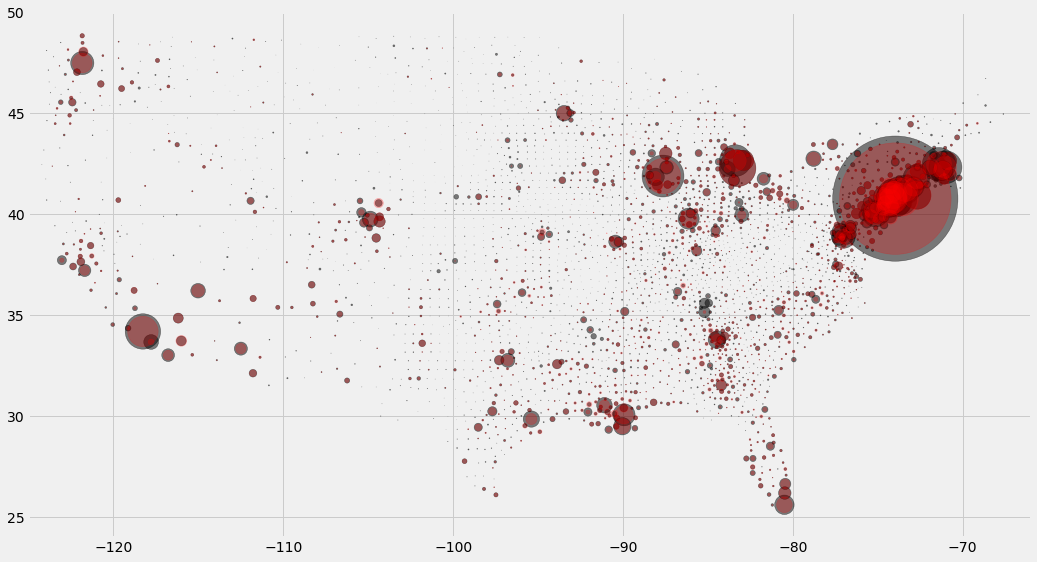

In [15]:
fips = pd.read_excel('fips_data.xlsx')[1:]
fips['lat'] = fips.apply(lambda x: float(re.sub('–','-',str(x['Latitude'])[:-1])),axis=1)
fips['lon'] = fips.apply(lambda x: float(re.sub('–','-',str(x['Longitude'])[:-1])),axis=1)
fips['index'] = fips['FIPS']

mapped = pd.merge(estimated_cases[[date]].reset_index(),estimated_recovered[[date]].reset_index(),on='index').set_index('index')
mapped['total'] = mapped.sum(axis=1)
mapped = pd.merge(mapped.reset_index(),fips[['index','lat','lon']],how='left',on='index').set_index('index')
mapped = pd.merge(mapped.reset_index(),ecbd[[date]].set_index(pd.Index(ecbd.index.values)).reset_index(),how='left',on='index')

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,9))
plt.scatter(mapped['lon'],mapped['lat'],s=[.01*x for x in mapped['total']],alpha=.5,color='black')
plt.scatter(mapped['lon'],mapped['lat'],s=[.01*x for x in mapped[date]],alpha=.25, label='Reported proportion',color='red')

plt.xlim(-125,-66)
plt.ylim(24,50)
plt.grid(True)
plt.show()


C:\Users\Kellen\Anaconda\envs\kellen\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


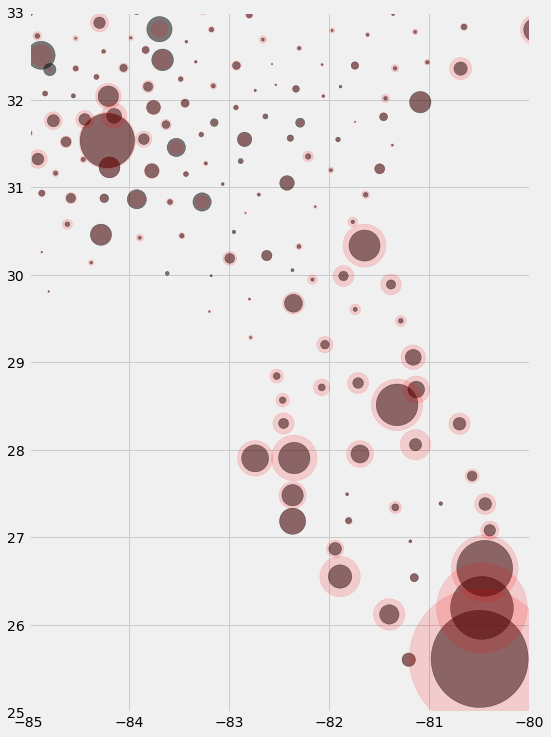

In [9]:
mapped = pd.merge(estimated_cases[[date]].reset_index(),estimated_recovered[[date]].reset_index(),on='index').set_index('index')
mapped['total'] = mapped.sum(axis=1)
mapped = pd.merge(mapped.reset_index(),fips[['index','lat','lon']],how='left',on='index').set_index('index')
mapped = pd.merge(mapped.reset_index(),cases_full[[date]].set_index(pd.Index(cases_full.index.values)).reset_index(),how='left',on='index')

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,12))
plt.scatter(mapped['lon'],mapped['lat'],s=[500*x/np.mean(mapped['total']) for x in mapped['total']],alpha=.5,color='black')
plt.scatter(mapped['lon'],mapped['lat'],s=[500*x/np.mean(mapped[date]) for x in mapped[date]],alpha=.15, label='Reported proportion',color='red')

plt.xlim(-85,-80)
plt.ylim(25,33)
plt.grid(True)
plt.show()


#### Section 2

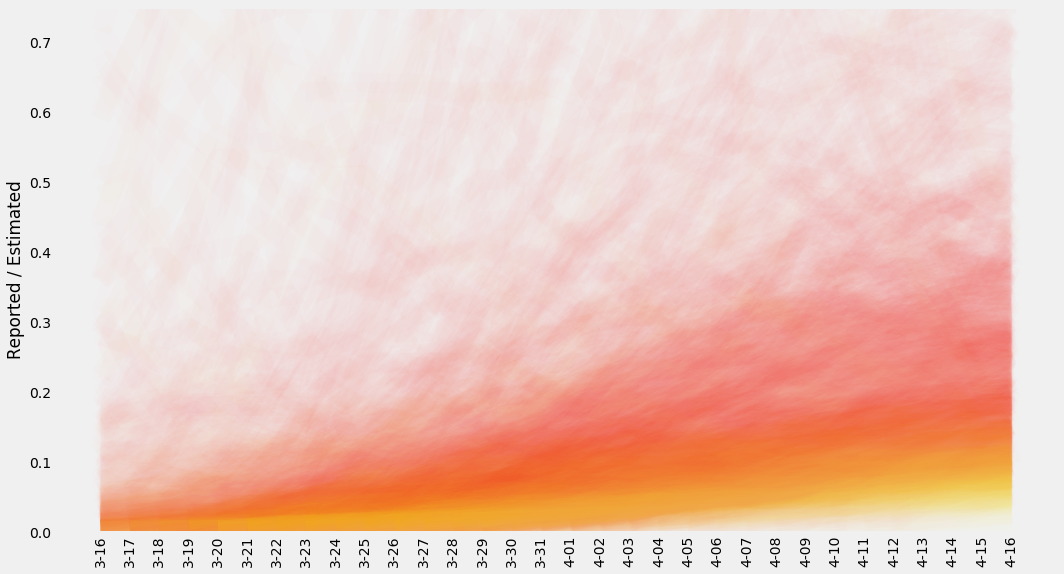

In [10]:
ratios = cases_full[list(t14_cases)]/(t14_cases + t14_recovered+1)
ratios = ratios.sort_values(by=list(ratios)[-1])

def remove0(x):
    if x == 0:
        return(None)
    else:
        return(x)
    
#(.25*FiIr**.25,FiIr,.75)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,9))

above_threshold = [x for x in ratios.index[::-1] if cases_added.loc[x].sum() > 30]

for fi in above_threshold:
    FiIr = above_threshold.index(fi)/len(above_threshold)
    rgb = (1,1*FiIr**2,.25*FiIr**2+.05)
    plt.plot([str(list(ratios)[i])[6:-9] for i in range(30,len(ratios.loc[fi]))],[remove0(np.mean(ratios.loc[fi][i-7:i])) for i in range(30,len(ratios.loc[fi]))],alpha=0.0075+0.005*(FiIr)**2,color=rgb,linewidth=20,label=FiIr)
plt.ylim(0,.75)
plt.xticks(rotation=90)

plt.ylabel('Reported / Estimated')
plt.grid(False)
plt.show()


#### Section 3

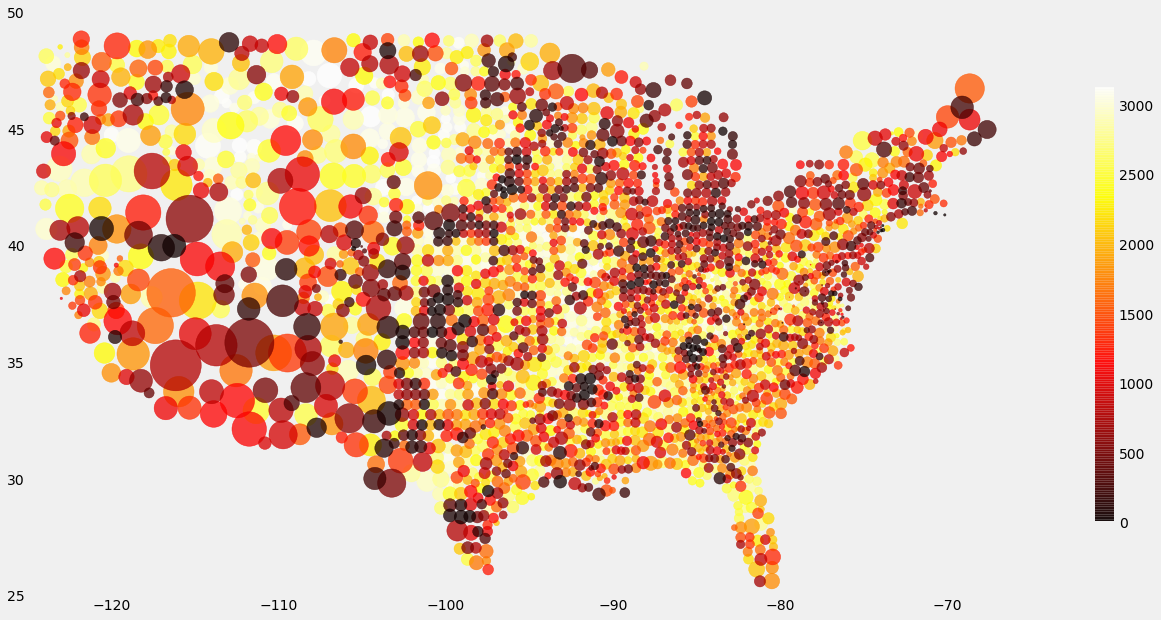

In [11]:
fully_mapped = pd.merge(estimated_cases[[date]].reset_index(),estimated_recovered[[date]].reset_index(),on='index').set_index('index')
fully_mapped['total'] = fully_mapped.sum(axis=1)
fully_mapped = pd.merge(fully_mapped.reset_index(),fips[['index','lat','lon','County\xa0[2]','Population','Land Area','State']],how='left',on='index').set_index('index')
fully_mapped = pd.merge(fully_mapped.reset_index(),cases_full[[date]].set_index(pd.Index(cases_full.index.values)).reset_index(),how='left',on='index')

fully_mapped['ratio'] =fully_mapped['total']/(fully_mapped[date]+1)
fully_mapped = fully_mapped.sort_values(by=['ratio','total']).set_index('index').reset_index()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.scatter(fully_mapped['lon'],fully_mapped['lat'],s = np.array([.05*float(x) for x in fully_mapped['Land Area']]),c = np.power(list(fully_mapped.index)[::-1],1),alpha=.75,cmap='hot')
plt.colorbar(shrink=.75)
plt.xlim(-125,-65)
plt.ylim(25,50)
plt.grid(False)
plt.show()


C:\Users\Kellen\Anaconda\envs\kellen\lib\site-packages\matplotlib\collections.py:875: ComplexWarning: Casting complex values to real discards the imaginary part
  self._transforms[:, 0, 0] = scale
C:\Users\Kellen\Anaconda\envs\kellen\lib\site-packages\matplotlib\collections.py:876: ComplexWarning: Casting complex values to real discards the imaginary part
  self._transforms[:, 1, 1] = scale


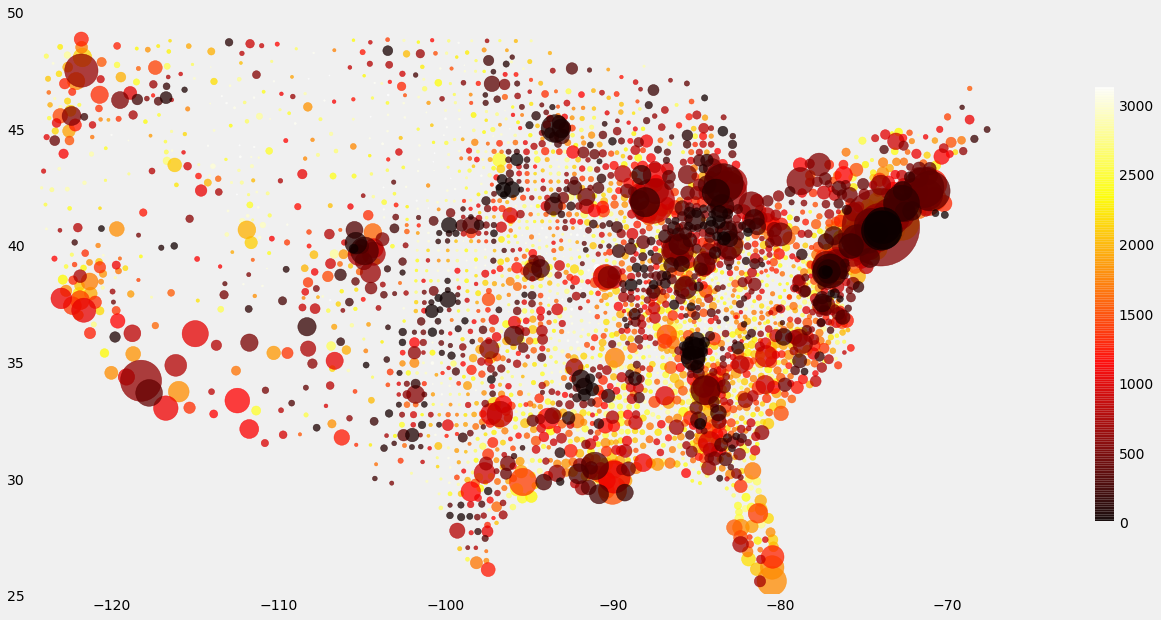

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.scatter(fully_mapped['lon'],fully_mapped['lat'],s = np.array([5*float(x)**.5 for x in (fully_mapped['total']-fully_mapped[date])]),c = np.power(list(fully_mapped.index)[::-1],1),alpha=.75,cmap='hot')
plt.colorbar(shrink=.75)
plt.xlim(-125,-65)
plt.ylim(25,50)
plt.grid(False)
plt.show()


In [13]:
grouped = fully_mapped.groupby('State').sum()[['total',date]]
grouped.columns = ['Estimated','Reported']
grouped['Score'] = (grouped['Estimated']-grouped['Reported'])/grouped['Reported']
grouped['Estimated'] = [int(x) for x in grouped['Estimated']]

rankings = grouped.sort_values(by='Score')

rankings = rankings.reset_index().reset_index()
rankings.columns = ['Rank'] + list(rankings)[1:]
